In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
digits = load_digits()

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [4]:
sgd = SGDClassifier(random_state=42)

sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
digits.target[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [10]:
sgd.predict(digits.data[:15])

array([0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [13]:
rforest = RandomForestClassifier(random_state=42)

In [14]:
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [38]:
rforest.predict(digits.data[:10])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

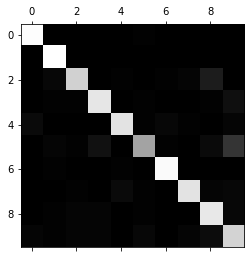

In [39]:
plt.matshow(rforest.predict_proba(digits.data[:10]), cmap=plt.cm.gray)

In [18]:
y_train_pred_sgd = cross_val_predict(sgd, X_train, y_train, cv=3)
y_train_pred_rforest = cross_val_predict(rforest, X_train, y_train, cv=3)

In [21]:
cnf_mat_sgd = confusion_matrix(y_train, y_train_pred_sgd)
cnf_mat_rforest = confusion_matrix(y_train, y_train_pred_rforest)

In [22]:
cnf_mat_sgd

array([[132,   0,   0,   0,   0,   1,   0,   0,   2,   0],
       [  0, 127,   0,   2,   0,   0,   2,   1,   9,   4],
       [  0,   0, 137,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 125,   0,   0,   0,   4,   5,   3],
       [  0,   2,   0,   0, 118,   0,   1,   1,   1,   3],
       [  0,   0,   0,   1,   0, 114,   1,   2,   1,   4],
       [  0,   1,   0,   0,   1,   1, 130,   0,   3,   0],
       [  0,   1,   0,   1,   1,   0,   0, 133,   1,   1],
       [  0,   7,   1,   1,   0,   1,   2,   1, 119,   4],
       [  0,   1,   0,   4,   0,   2,   0,   4,   5, 116]], dtype=int64)

In [23]:
cnf_mat_rforest

array([[134,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 143,   0,   1,   0,   0,   0,   0,   0,   1],
       [  1,   0, 137,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0,   1, 131,   0,   1,   0,   2,   1,   0],
       [  0,   0,   0,   0, 123,   0,   0,   3,   0,   0],
       [  0,   0,   0,   1,   1, 117,   0,   0,   1,   3],
       [  1,   0,   0,   0,   1,   0, 133,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0, 137,   0,   0],
       [  0,   4,   3,   1,   1,   0,   0,   2, 124,   1],
       [  0,   0,   0,   3,   0,   1,   0,   1,   3, 124]], dtype=int64)

In [25]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

array([0.92427617, 0.92650334, 0.93541203])

In [26]:
cross_val_score(rforest, X_train, y_train, cv=3, scoring="accuracy")

array([0.96436526, 0.96436526, 0.97327394])

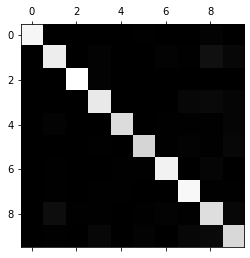

In [35]:
plt.matshow(cnf_mat_sgd, cmap=plt.cm.gray) # SGDClassifier confusions matrix

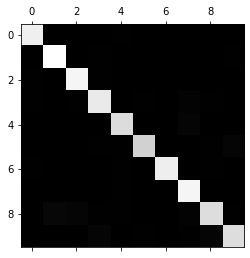

In [36]:
plt.matshow(cnf_mat_rforest, cmap=plt.cm.gray) #RandomForestClassifer confusion matrix